### Look-up Table

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from jupyterthemes import jtplot
jtplot.reset()

In [2]:
###integration of spectral radiance in wavelength range. 
def planck_integral(lam,T_actual15):
    h = 6.6260693e-34
    k = 1.380658e-23
    c = 2.9979e8 


    #compute the power of x, spectral coordinate
    c1 = h*c/k
    a = np.multiply(T_actual15,lam)
    x = np.divide(c1, a)               
    iterations = 2 + 20/x
    
    if (iterations < 512):
        iterations = iterations
    else:
        iterations = 512
    
    runs = np.int(iterations)
    #print(runs)
    add = 0
    for i in range(1,runs):
        dn = 1/i 
        add += np.multiply(np.exp(-i*x),(np.multiply(np.power(x,3),dn) + 
                                          3* np.multiply(np.power(x,2),dn**2) + 
                                          6*np.multiply(x,dn**3) + 6*(dn**4)))
        #add += np.multiply(np.exp(-i*x),np.multiply((np.power(x,3)) + np.multiply(np.multiply(3,np.power(x,2)) 
         #                                                + np.multiply(6,np.multiply((x + dn),dn)),dn),dn))
    #####check this code
    c2 = -2 * (k**4) * (T_actual15**4)/((h**3)*(c**2))
    return np.multiply( c2, add )

In [3]:
T = np.arange(-60,40,0.1) 

# radiance integration from 4um to infinity(calucalated)
lam1 = 8e-6
#lam = np.multiply(lam,1e-6)
tem = T + 273.3
L1 = np.array([])

for n in range(tem.size):
    R1 = planck_integral(lam1,tem[n])
    L1 = np.append(L1,R1)
    

# radiance integration from 4um to infinity(calucalated)
lam2 = 14e-6
#lam = np.multiply(lam,1e-6)
tem = T + 273.3
L2 = np.array([])

for n in range(tem.size):
    R2 = planck_integral(lam2,tem[n])
    L2 = np.append(L2,R2)

In [4]:
L = L1 - L2

df_15 = pd.DataFrame({'Temperature':T[:]+273.3,'Radiance':L[:]})

# writer = pd.ExcelWriter('Look-up.xlsx', engine='xlsxwriter')
# df15.to_excel(writer, sheet_name='Radiance', index=False)
# writer.save()

df_15.to_csv('DWD_code_data/look_up.csv',index= None, header = True)

In [5]:
# df_15
T = np.arange(-60,40,0.1)+273.3

In [6]:
fit1 = np.polyfit(L,T,1)
fit2 = np.polyfit(L,T,2)
fit3 = np.polyfit(L,T,3)
fit4 = np.polyfit(L,T,4)

fit5 = np.polyfit(L,T,5)
fit6 = np.polyfit(L,T,6)
fit7 = np.polyfit(L,T,7)
fit8 = np.polyfit(L,T,8)
fit9 = np.polyfit(L,T,9)
fit10 = np.polyfit(L,T,10)

fit5

array([ 1.68411440e-07, -3.81496944e-05,  3.49478118e-03, -1.71582498e-01,
        6.02022596e+00,  1.70899111e+02])

In [7]:
T_modeled1 = np.multiply(fit1[0],np.power(L,1)) +\
             + fit1[1]


T_modeled2 = np.multiply(fit2[0],np.power(L,2)) +\
             np.multiply(fit2[1],np.power(L,1)) + \
             + fit2[2]

T_modeled3 = np.multiply(fit3[0],np.power(L,3)) +\
            np.multiply(fit3[1],np.power(L,2)) + \
            np.multiply(fit3[2],np.power(L,1)) + \
            + fit3[3]

T_modeled4 = np.multiply(fit4[0],np.power(L,4)) +\
            np.multiply(fit4[1],np.power(L,3)) + \
            np.multiply(fit4[2],np.power(L,2)) + \
            np.multiply(fit4[3],np.power(L,1)) + fit4[4]

T_modeled5 = np.multiply(fit5[0],np.power(L,5)) +\
            np.multiply(fit5[1],np.power(L,4)) + \
            np.multiply(fit5[2],np.power(L,3)) + \
            np.multiply(fit5[3],np.power(L,2)) + \
            np.multiply(fit5[4],np.power(L,1)) + fit5[5]

T_modeled6 = np.multiply(fit6[0],np.power(L,6)) +\
            np.multiply(fit6[1],np.power(L,5)) + \
            np.multiply(fit6[2],np.power(L,4)) + \
            np.multiply(fit6[3],np.power(L,3)) + \
            np.multiply(fit6[4],np.power(L,2)) + \
            np.multiply(fit6[5],np.power(L,1)) + fit6[6]

T_modeled7 = np.multiply(fit7[0],np.power(L,7)) +\
            np.multiply(fit7[1],np.power(L,6)) + \
            np.multiply(fit7[2],np.power(L,5)) + \
            np.multiply(fit7[3],np.power(L,4)) + \
            np.multiply(fit7[4],np.power(L,3)) + \
            np.multiply(fit7[5],np.power(L,2)) + \
            np.multiply(fit7[6],np.power(L,1)) + \
            fit7[7]

T_modeled8 = np.multiply(fit8[0],np.power(L,8)) +\
            np.multiply(fit8[1],np.power(L,7)) + \
            np.multiply(fit8[2],np.power(L,6)) + \
            np.multiply(fit8[3],np.power(L,5)) + \
            np.multiply(fit8[4],np.power(L,4)) + \
            np.multiply(fit8[5],np.power(L,3)) + \
            np.multiply(fit8[6],np.power(L,2)) + \
            np.multiply(fit8[7],np.power(L,1)) + \
            fit8[8]

T_modeled9 = np.multiply(fit9[0],np.power(L,9)) +\
            np.multiply(fit9[1],np.power(L,8)) + \
            np.multiply(fit9[2],np.power(L,7)) + \
            np.multiply(fit9[3],np.power(L,6)) + \
            np.multiply(fit9[4],np.power(L,5)) + \
            np.multiply(fit9[5],np.power(L,4)) + \
            np.multiply(fit9[6],np.power(L,3)) + \
            np.multiply(fit9[7],np.power(L,2)) + \
            np.multiply(fit9[8],np.power(L,1)) + \
            fit9[9]

T_modeled10 = np.multiply(fit10[0],np.power(L,10)) +\
            np.multiply(fit10[1],np.power(L,9)) + \
            np.multiply(fit10[2],np.power(L,8)) + \
            np.multiply(fit10[3],np.power(L,7)) + \
            np.multiply(fit10[4],np.power(L,6)) + \
            np.multiply(fit10[5],np.power(L,5)) + \
            np.multiply(fit10[6],np.power(L,4)) + \
            np.multiply(fit10[7],np.power(L,3)) + \
            np.multiply(fit10[8],np.power(L,2)) + \
            np.multiply(fit10[9],np.power(L,1)) + \
            fit10[10]


In [8]:

# T_modeled5.shape
# residual5

Max. relative error order 1: 1.8818022622564872
Min. relative error order 1: -4.972168715206645
Between +-0.1 order 1: 3.1


Max. relative error order 2: 0.885673681815239
Min. relative error order 2: -1.631593375837395
Between +-0.1 order 2: 11.2


Max. relative error order 3: 0.22605874245558186
Min. relative error order 3: -0.5994033701410798
Between +-0.1 order 3: 37.0


Max. relative error order 4: 0.1195664901172899
Min. relative error order 4: -0.23292288639286718
Between +-0.1 order 4: 96.2


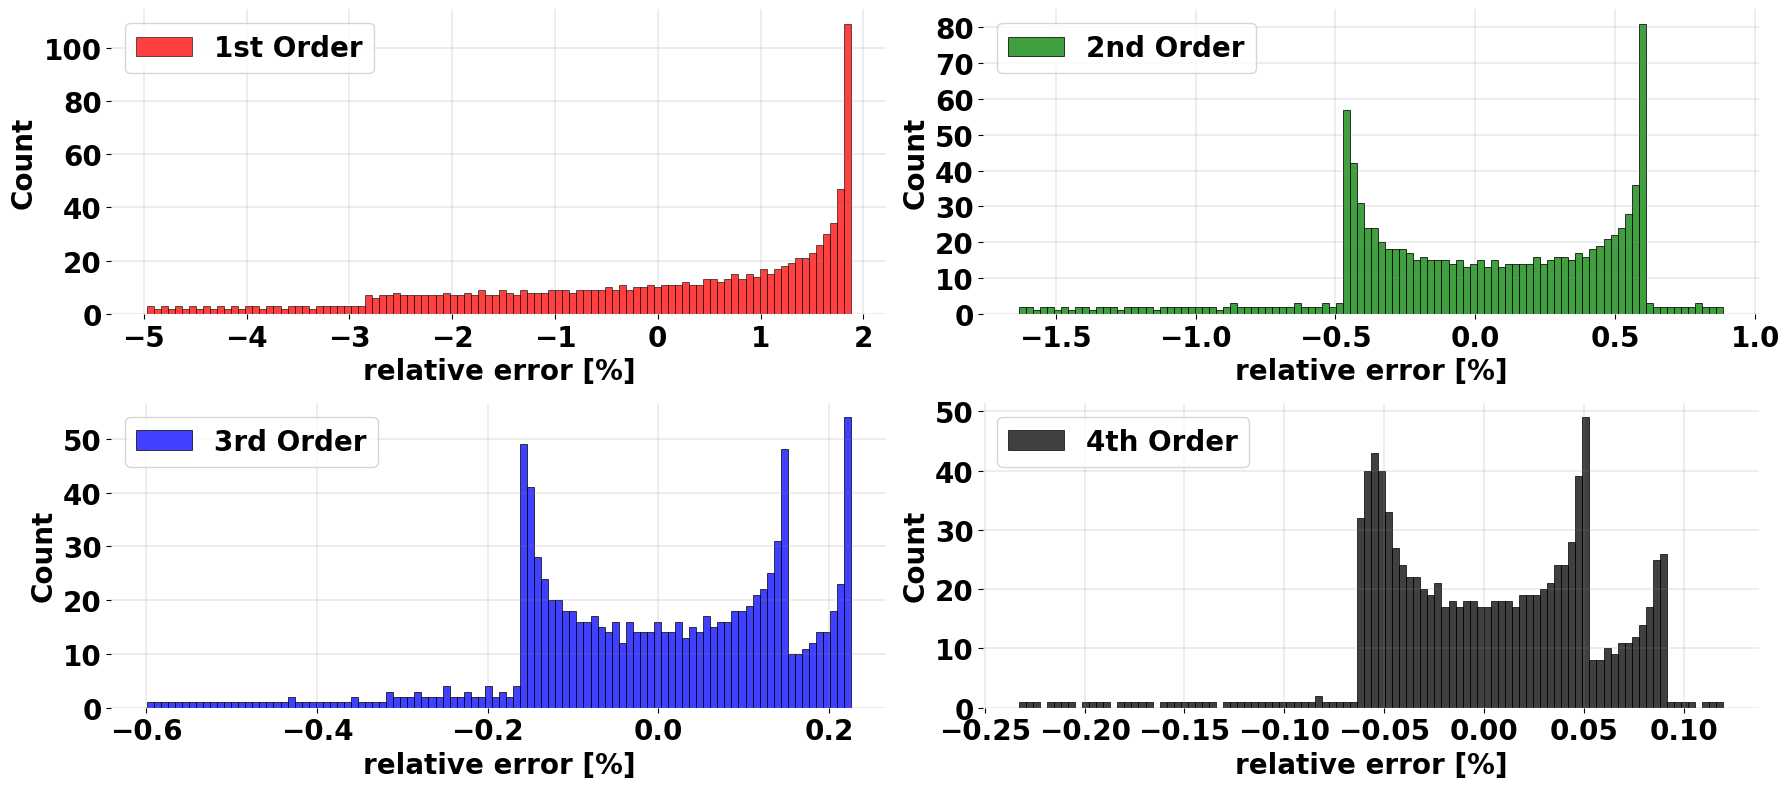

In [45]:
residual1 = T - T_modeled1
residual2 = T - T_modeled2
residual3 = T - T_modeled3
residual4 = T - T_modeled4
residual5 = T - T_modeled5
residual6 = T - T_modeled6
residual7 = T - T_modeled7
residual8 = T - T_modeled8
residual9 = T - T_modeled9
residual10 = T - T_modeled10

###Relative residual
rel1 = np.divide(residual1,T)*100
rel2 = np.divide(residual2,T)*100
rel3 = np.divide(residual3,T)*100
rel4 = np.divide(residual4,T)*100
# rel5 = np.divide(residual5,T)*100
# rel6 = np.divide(residual6,T)*100
# rel7 = np.divide(residual7,T)*100
# rel8 = np.divide(residual8,T)*100
# rel9 = np.divide(residual9,T)*100
# rel10 = np.divide(residual10,T)*100
print('Max. relative error order 1:', max(rel1))
print('Min. relative error order 1:', min(rel1))
print('Between +-0.1 order 1:',len(rel1[(rel1 > -0.1) &(rel1 < 0.1)])*100/len(rel1))
print('\n')

print('Max. relative error order 2:', max(rel2))
print('Min. relative error order 2:', min(rel2))
print('Between +-0.1 order 2:',len(rel2[(rel2 > -0.1) &(rel2 < 0.1)])*100/len(rel2))
print('\n')

print('Max. relative error order 3:', max(rel3))
print('Min. relative error order 3:', min(rel3))
print('Between +-0.1 order 3:',len(rel3[(rel3 > -0.1) &(rel3 < 0.1)])*100/len(rel3))
print('\n')

print('Max. relative error order 4:', max(rel4))
print('Min. relative error order 4:', min(rel4))
print('Between +-0.1 order 4:',len(rel4[(rel4 > -0.1) &(rel4 < 0.1)])*100/len(rel4))

import seaborn as sns
fig = plt.figure(figsize = (18,8))
plt.subplot(2,2,1)
sns.histplot(rel1,color = 'r', bins = 100,label = '1st Order')
plt.xlabel('relative error [%]',size = 20,fontweight = 'bold')
plt.ylabel('Count',size = 20,fontweight = 'bold')
plt.xticks(fontweight = 'bold',size = 20)
plt.yticks(fontweight = 'bold',size = 20)
plt.legend(loc = 'best',prop = {'size':20,'weight':'bold'})
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
plt.box()

plt.subplot(2,2,2)
sns.histplot(rel2,color = 'g', bins = 100,label = '2nd Order')
plt.xlabel('relative error [%]',size = 20,fontweight = 'bold')
plt.ylabel('Count',size = 20,fontweight = 'bold')
plt.xticks(fontweight = 'bold',size = 20)
plt.yticks(fontweight = 'bold',size = 20)
plt.legend(loc = 'best',prop = {'size':20,'weight':'bold'})
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
plt.box()

plt.subplot(2,2,3)
sns.histplot(rel3,color = 'b', bins = 100,label = '3rd Order')
plt.xlabel('relative error [%]',size = 20,fontweight = 'bold')
plt.ylabel('Count',size = 20,fontweight = 'bold')
plt.xticks(fontweight = 'bold',size = 20)
plt.yticks(fontweight = 'bold',size = 20)
plt.legend(loc = 'best',prop = {'size':20,'weight':'bold'})
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
plt.box()

plt.subplot(2,2,4)
sns.histplot(rel4,color = 'k', bins = 100,label = '4th Order')
plt.xlabel('relative error [%]',size = 20,fontweight = 'bold')
plt.ylabel('Count',size = 20,fontweight = 'bold')
plt.xticks(fontweight = 'bold',size = 20)
plt.yticks(fontweight = 'bold',size = 20)
plt.legend(loc = 'best',prop = {'size':20,'weight':'bold'})
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
plt.box()
plt.show()

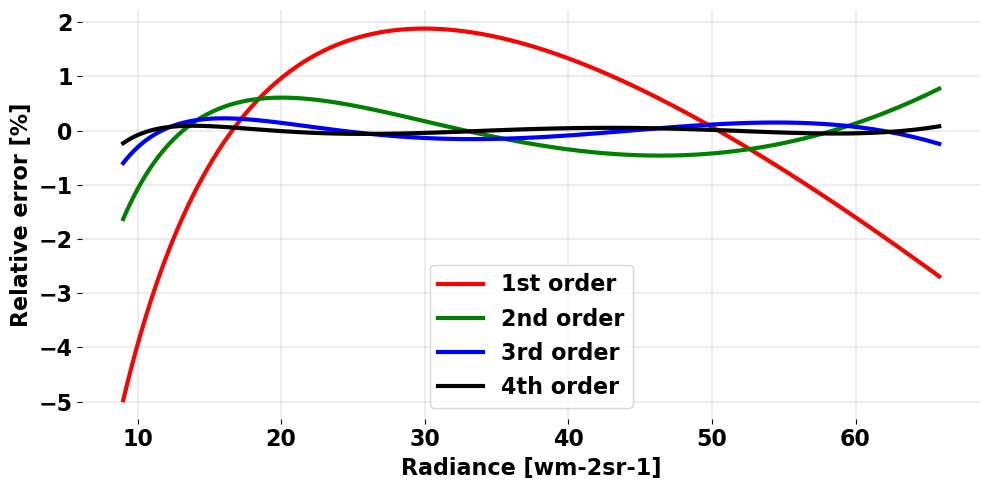

In [38]:
# fig = plt.figure(figsize = (15,5))


# plt.subplot(1,2,1)
# plt.plot(L[0::10],residual1[0::10],label = '1st order')
# plt.plot(L[0::10],residual2[0::10],label = '2nd order')
# plt.plot(L[0::10],residual3[0::10],label = '3rd order')
# plt.plot(L[0::10],residual4[0::10],label = '4th order')
# # plt.plot(L[0::10],residual5[0::10],label = '5th order')
# # plt.plot(L[0::10],residual6[0::10],label = '6th order')
# # plt.plot(L[0::10],residual7[0::10],label = '7th order')
# # plt.plot(L[0::10],residual8[0::10],label = '8th order')

# plt.xlabel('Radiance in wm-2sr-1',fontweight = 'bold')
# plt.ylabel('Absolute error',fontweight = 'bold')
# plt.xticks(fontweight = 'bold')
# plt.yticks(fontweight = 'bold')
# plt.legend(loc = 'best')
# plt.grid(color = 'gray',linewidth = 0.2)
# plt.tight_layout()


# plt.subplot(1,2,2)
plt.figure(figsize = (10,5))
plt.plot(L[0::10],rel1[0::10],'r',linewidth = 3,label = '1st order')
plt.plot(L[0::10],rel2[0::10],'g',linewidth = 3,label = '2nd order')
plt.plot(L[0::10],rel3[0::10],'b',linewidth = 3,label = '3rd order')
plt.plot(L[0::10],rel4[0::10],'k',linewidth = 3,label = '4th order')
# plt.plot(L[0::10],rel5[0::10],label = '5th order')
# plt.plot(L[0::10],rel6[0::10],label = '6th order')
# plt.plot(L[0::10],rel7[0::10],label = '7th order')
# plt.plot(L[0::10],rel8[0::10],label = '8th order')

plt.xlabel('Radiance [wm-2sr-1]',size = 16,fontweight = 'bold')
plt.ylabel('Relative error [%]',size = 16,fontweight = 'bold')
plt.xticks(fontweight = 'bold',size = 16)
plt.yticks(fontweight = 'bold',size = 16)
plt.legend(loc = 'best',prop = {'size':16,'weight':'bold'})
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
plt.box()
plt.show()

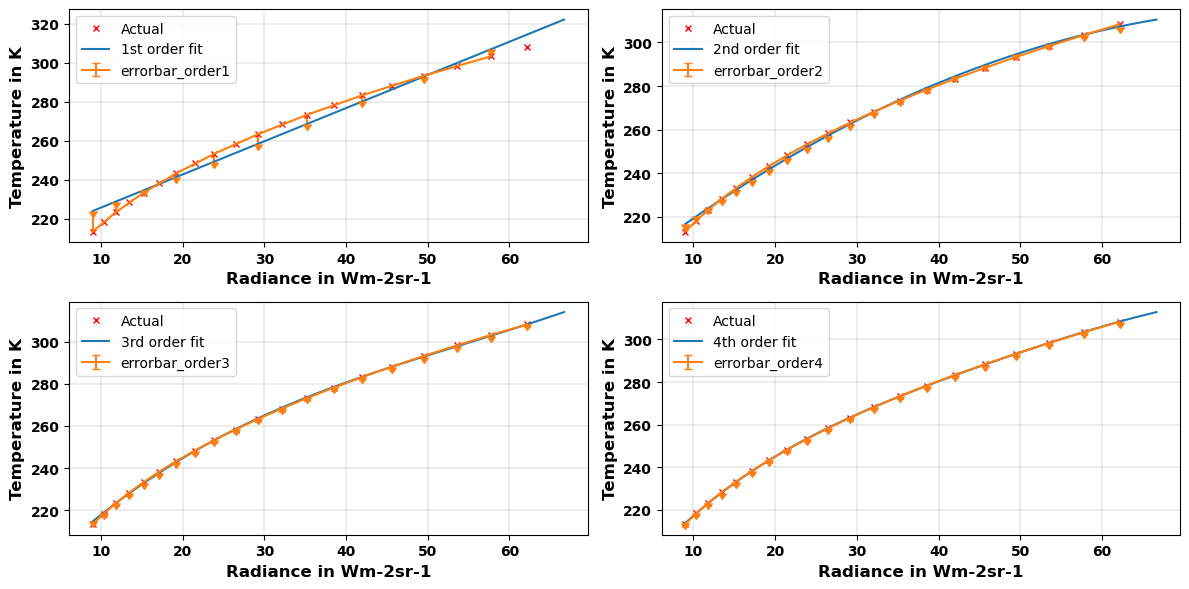

In [165]:
fig = plt.figure(figsize = (12,6)) 

plt.subplot(2,2,1)
plt.plot(L[0::50],T[0::50],'rx',markersize = 5,label = 'Actual')
# plt.errorbar(L[0::50],T[0::50], residual2[0::50], label = 'errorbar')
plt.plot(L,T_modeled1,linewidth = 1.5,label = '1st order fit')
plt.errorbar(L[0::100],T[0::100], residual1[0::100],uplims = True, 
             lolims = False,label = 'errorbar_order1')

plt.ylabel('Temperature in K',size = 12,fontweight = 'bold' )
plt.xlabel('Radiance in Wm-2sr-1',size = 12,fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()


plt.subplot(2,2,2)
plt.plot(L[0::50],T[0::50],'rx',markersize = 5,label = 'Actual')
# plt.errorbar(L[0::50],T[0::50], residual3[0::50], label = 'errorbar')
plt.plot(L,T_modeled2,linewidth = 1.5,label = '2nd order fit')
plt.errorbar(L[0::50],T[0::50], residual2[0::50],uplims = True, 
             lolims = False,label = 'errorbar_order2')

plt.ylabel('Temperature in K',size = 12,fontweight = 'bold' )
plt.xlabel('Radiance in Wm-2sr-1',size = 12,fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()


# # plt.figure(figsize = (4,4))
plt.subplot(2,2,3)
plt.plot(L[0::50],T[0::50],'rx',markersize = 5,label = 'Actual')
plt.plot(L,T_modeled3,linewidth = 1.5,label = '3rd order fit')
plt.errorbar(L[0::50],T[0::50], residual3[0::50],uplims = True, 
             lolims = False,label = 'errorbar_order3')

plt.ylabel('Temperature in K',size = 12,fontweight = 'bold' )
plt.xlabel('Radiance in Wm-2sr-1',size = 12,fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()

# # plt.figure(figsize = (4,4))
plt.subplot(2,2,4)
plt.plot(L[0::50],T[0::50],'rx',markersize = 5,label = 'Actual')
plt.plot(L,T_modeled4,linewidth = 1.5,label = '4th order fit')
plt.errorbar(L[0::50],T[0::50], residual4[0::50],uplims = True, 
             lolims = False,label = 'errorbar_order4')

plt.ylabel('Temperature in K',size = 12,fontweight = 'bold' )
plt.xlabel('Radiance in Wm-2sr-1',size = 12,fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
plt.show()

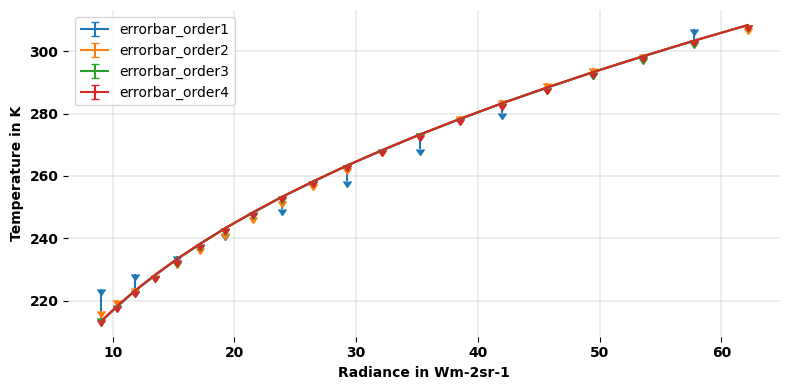

In [164]:
plt.figure(figsize = (8,4))
plt.errorbar(L[0::100],T[0::100], residual1[0::100],uplims = True, 
             lolims = False,label = 'errorbar_order1')
plt.errorbar(L[0::50],T[0::50], residual2[0::50],uplims = True, 
             lolims = False,label = 'errorbar_order2')
plt.errorbar(L[0::50],T[0::50], residual3[0::50],uplims = True, 
             lolims = False,label = 'errorbar_order3')
plt.errorbar(L[0::50],T[0::50], residual4[0::50],uplims = True, 
             lolims = False,label = 'errorbar_order4')

plt.xlabel('Radiance in Wm-2sr-1',fontweight= 'bold')
plt.ylabel('Temperature in K',fontweight= 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.legend(loc = 'best')
plt.tight_layout()
plt.box()
plt.grid(color = 'gray',linewidth = 0.2)
plt.show()

In [167]:
plt.figure(figsize = (8,5))

# plt.plot(L[0::50],T[0::50],'bx',markersize = 5,label = 'Actual')
# plt.plot(L,T_modeled2,linewidth = 1.5,label = '2nd order fit')
# plt.plot(L,T_modeled3,linewidth = 1.5,label = '3rd order fit')
# plt.plot(L,T_modeled4,linewidth = 1.5,label = '4th order fit')
# plt.plot(L,T_modeled5,linewidth = 1.5,label = '5th order fit')

# plt.ylabel('Temperature in K',size = 12,fontweight = 'bold' )
# plt.xlabel('Radiance in Wm-2sr-1',size = 12,fontweight = 'bold')
# plt.xticks(fontweight = 'bold')
# plt.yticks(fontweight = 'bold')
# plt.legend(loc = 'best')
# plt.grid(color = 'gray',linewidth = 0.2)
# plt.tight_layout()

# plt.show()

<Figure size 800x500 with 0 Axes>

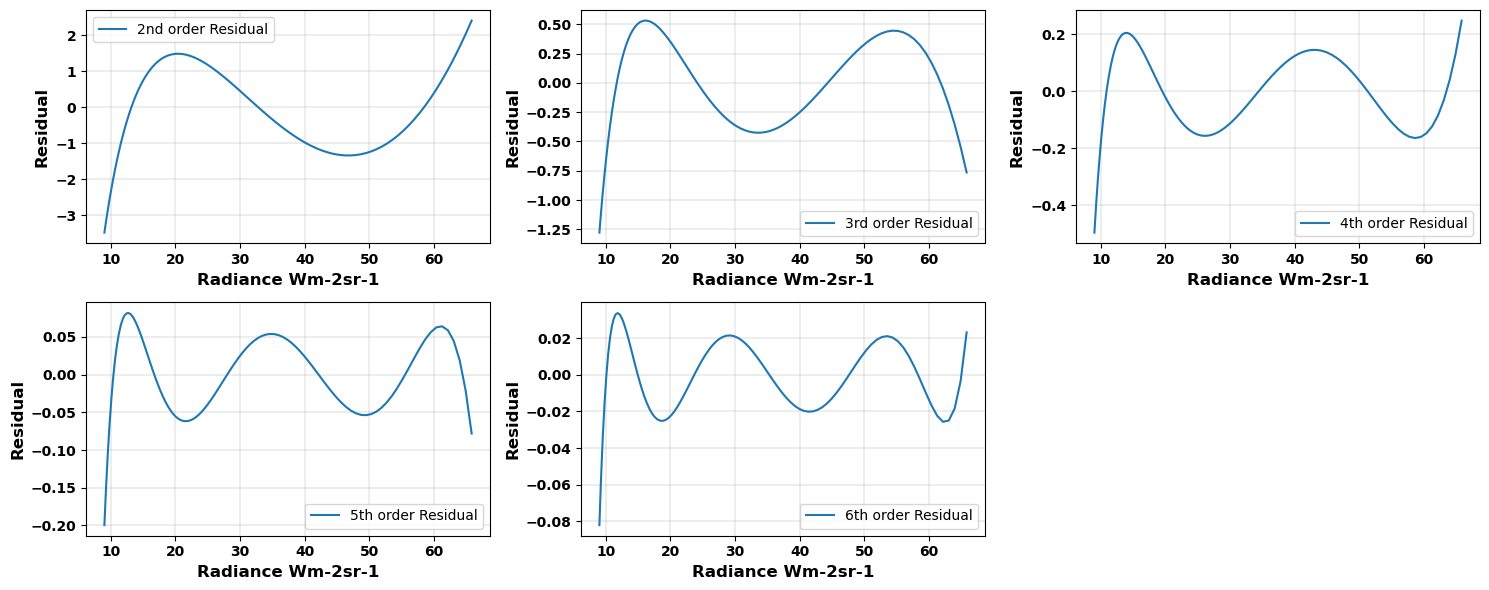

In [106]:
# plt.figure(figsize = (4,4))
fig = plt.figure(figsize = (15,6))

plt.subplot(2,3,1)
plt.plot(L[0::10],residual2[0::10],linewidth = 1.5,label = '2nd order Residual')
plt.xlabel('Radiance Wm-2sr-1',size = 12,fontweight = 'bold' )
plt.ylabel('Residual',size = 12,fontweight = 'bold' )
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()

plt.subplot(2,3,2)
plt.plot(L[0::10],residual3[0::10],linewidth = 1.5,label = '3rd order Residual')
plt.xlabel('Radiance Wm-2sr-1',size = 12,fontweight = 'bold' )
plt.ylabel('Residual',size = 12,fontweight = 'bold' )
# plt.legend(loc = 'best')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
# plt.show()

# plt.figure(figsize = (4,4))
plt.subplot(2,3,3)
plt.plot(L[0::10],residual4[0::10],linewidth = 1.5,label = '4th order Residual')
plt.xlabel('Radiance Wm-2sr-1',size = 12,fontweight = 'bold' )
plt.ylabel('Residual',size = 12,fontweight = 'bold' )
# plt.legend(loc = 'best')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
# plt.show()

# plt.figure(figsize = (4,4))
plt.subplot(2,3,4)
plt.plot(L[0::10],residual5[0::10],linewidth = 1.5,label = '5th order Residual')
# plt.grid()
plt.xlabel('Radiance Wm-2sr-1',size = 12,fontweight = 'bold' )
plt.ylabel('Residual',size = 12,fontweight = 'bold' )
# plt.legend(loc = 'best')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
# plt.show()

# plt.figure(figsize = (4,4))
plt.subplot(2,3,5)
plt.plot(L[0::10],residual6[0::10],linewidth = 1.5,label = '6th order Residual')
plt.xlabel('Radiance Wm-2sr-1',size = 12,fontweight = 'bold' )
plt.ylabel('Residual',size = 12,fontweight = 'bold' )
# plt.legend(loc = 'best')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'best')
plt.grid(color = 'gray',linewidth = 0.2)
plt.tight_layout()
plt.show()



In [169]:
# #plt.plot(L[0::10],residual3[0::10],linewidth = 1.5,label = '3rd order Residual')
# plt.plot(L[0::10],residual4[0::10],linewidth = 1.5,label = '4th order Residual')
# plt.plot(L[0::10],residual5[0::10],linewidth = 1.5,label = '5th order Residual')
# plt.plot(L[0::10],residual6[0::10],linewidth = 1.5,label = '6th order Residual')
# plt.plot(L[0::10],residual7[0::10],linewidth = 1.5,label = '7th order Residual')
# plt.plot(L[0::10],residual8[0::10],linewidth = 1.5,label = '8th order Residual')
# plt.plot(L[0::10],residual9[0::10],linewidth = 1.5,label = '9th order Residual')
# plt.plot(L[0::10],residual10[0::10],linewidth = 1.5,label = '10th order Residual')

# plt.legend(loc = 'best')
# plt.xlabel('Radiance in Wm-2sr-1')
# plt.ylabel('Residual')
# plt.grid()
# plt.show()
fit4

array([-7.00668151e-06,  1.34942027e-03, -1.03836055e-01,  5.05728049e+00,
        1.75745362e+02])